In [1]:
# import numpy and exp mat
import os
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

In [2]:
from module.QuantumSystem import SHOscillator
from module.Walker import MetropolisWalker
from module.Utils import VMC

# Spherical Harmonic Oscillator without interaction, with Metropolis and analytical hamiltonian
In this notebook we study the Spherical Harmonic Oscillator without interaction, using the Metropolis algorithm and analytical hamiltonian.

In the first section we study the scaling of the execution time and the std of the mean energy (for an non optimal variational parameter) as function of the dimension of the system and the number of particles and fixed sampling steps.

In [3]:
plot_dir = 'results/GroundState/'
params = np.array([0.5])
warmup_steps = 5000
calibrate_steps = 5000
run_steps = 10000

N = 10
D = 3

system = SHOscillator(N, D, params)
walker = MetropolisWalker(system)
vmc = VMC(system, walker, params, 
          warmup_steps, run_steps, 
          calibrate_steps, acceptance_rate=0.5,
          block_quantiles=0.8, plot=True, verbose=True, plot_dir=plot_dir)

-----------------
VMC calibrate
-----------------
delta: 0.5773502691896258
subgroup_size: 1
Acceptance rate: 0.626
-----------------
VMC warmup
-----------------
Parameters: [0.5]
Acceptance rate: 0.5282


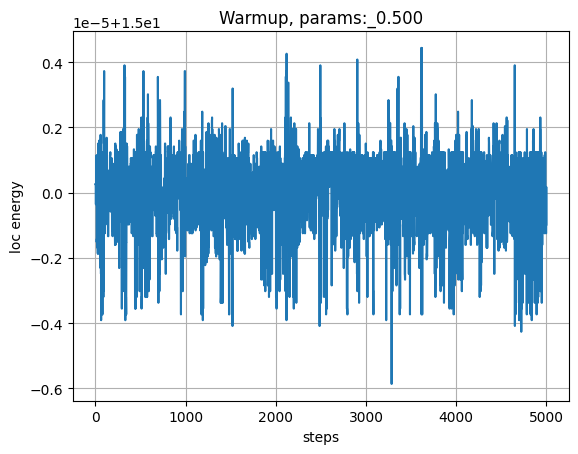

-----------------
VMC run
-----------------
Parameters: [0.5]
Acceptance rate: 0.528
Time:  0.17927885055541992
Energy: 15.000000006054284 +/- 2.640110282811959e-08


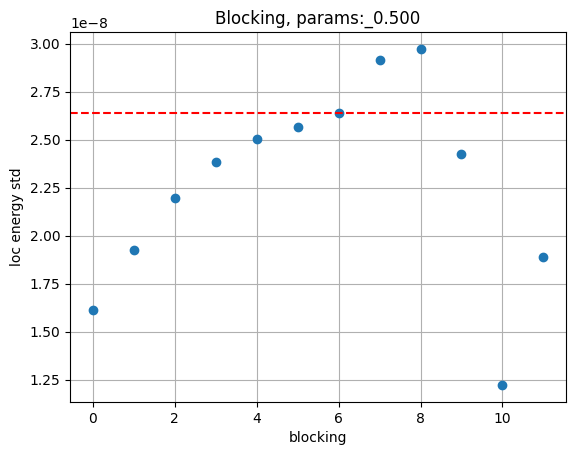

In [4]:
# warmup
vmc.calibrate()
vmc.warmup()
vmc.run()

## Compare with analytical results
In this section we compare the results of the grid search with the analytical results, in particular we show that the mean energy is the exact ground state energy of the system.

In [5]:
print('MC mean energy:', vmc.get_energy(), '+-', vmc.get_energy_std())  
print('Analytical energy:', 0.5*N*D, '+-', 0.0)

MC mean energy: 15.000000006054284 +- 2.640110282811959e-08
Analytical energy: 15.0 +- 0.0


In [7]:
2**10

1024